Link to original dataset is  [here](https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification). In short - The Portugese Bank wants to identify clients that have a high chance of commiting to a longer deposit 

# Exploratory Data Analysis

## Initial imports

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [118]:
data = pd.read_csv('new_train.csv')
size = data.shape[0]
display(data.head(), data.info(),data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


None

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [119]:
data_test = data.sample(frac=0.3)
data = data.drop(data_test.index)

In [120]:
data_test.shape[0] + data.shape[0] == size

True

In [121]:
data.shape

(23065, 16)

In [122]:
data_test.shape

(9885, 16)

In [123]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [124]:
data.nunique()

age              74
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1349
campaign         40
pdays            26
previous          8
poutcome          3
y                 2
dtype: int64

Data seems to not contain any null values

## Univariate data visualization - categorical columns -

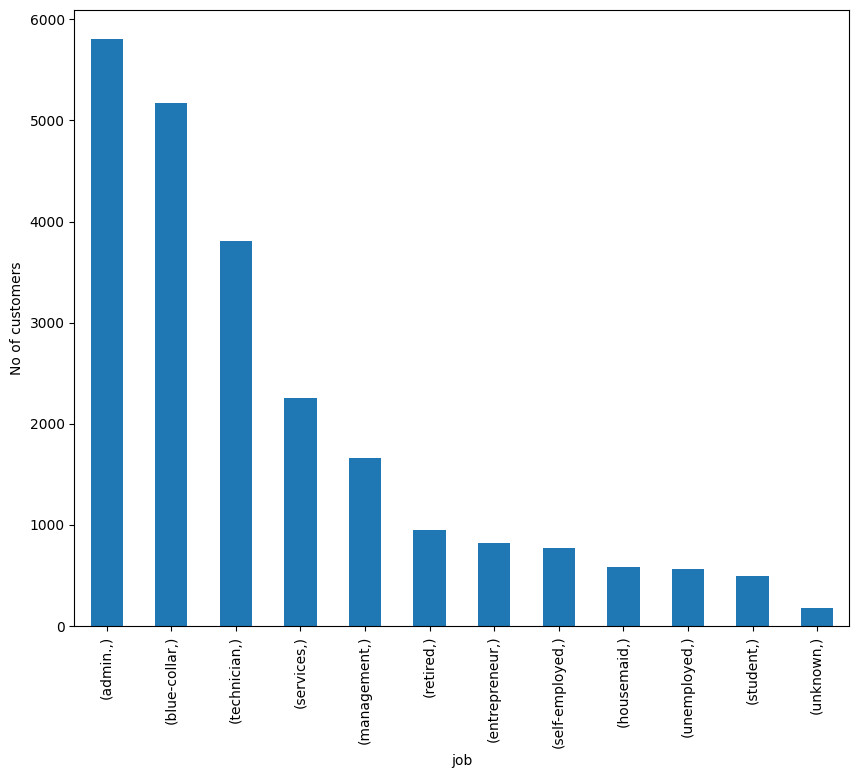

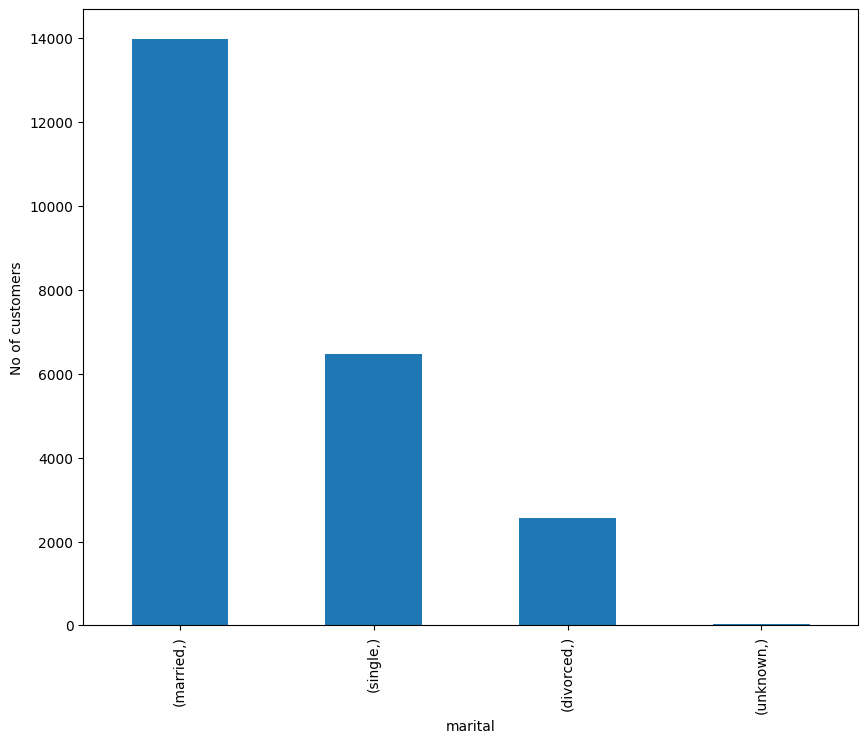

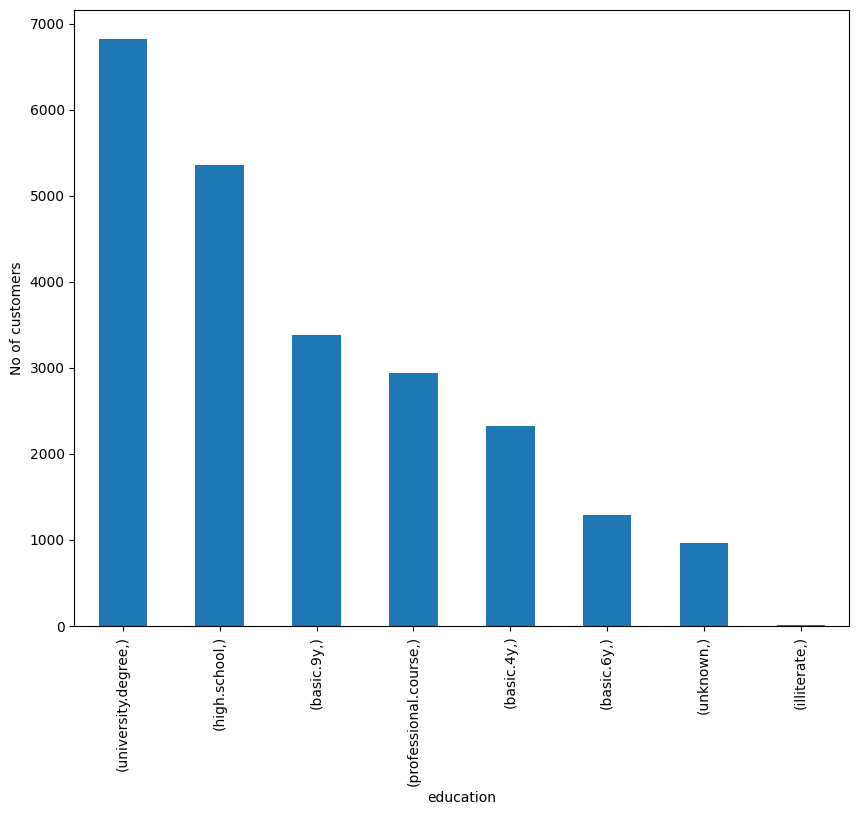

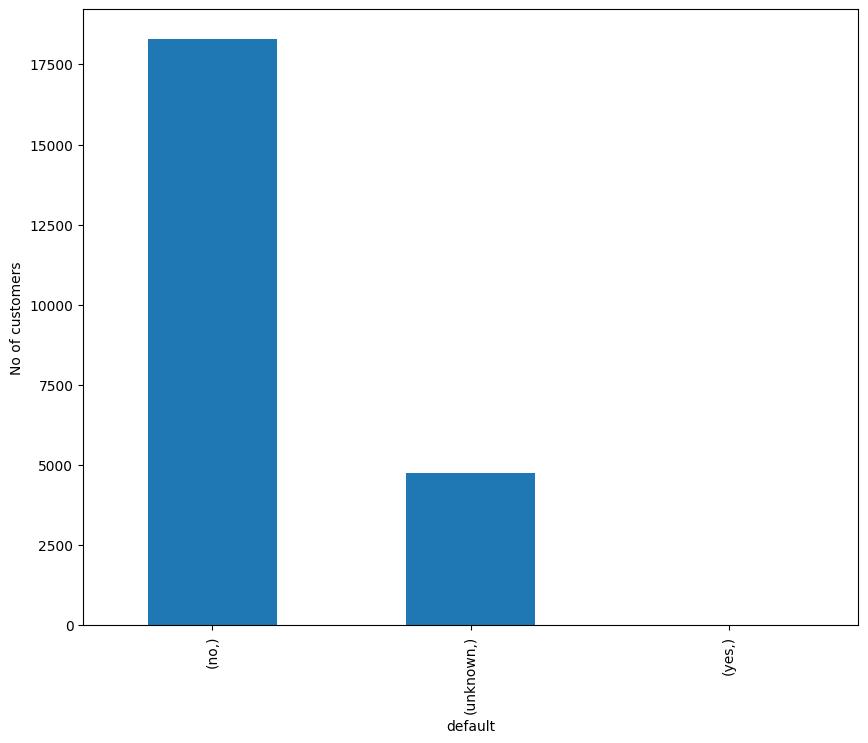

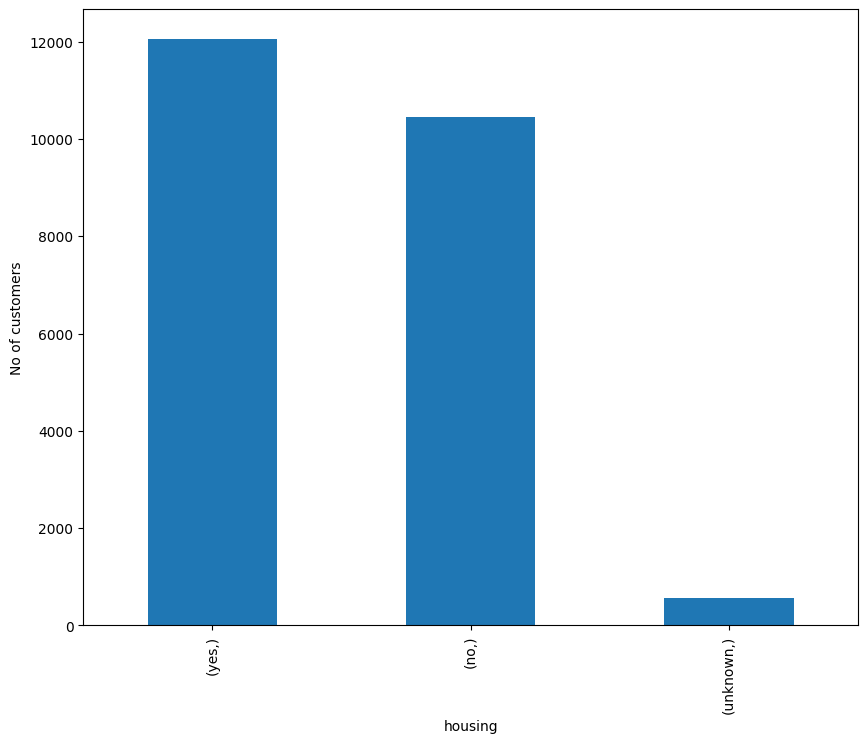

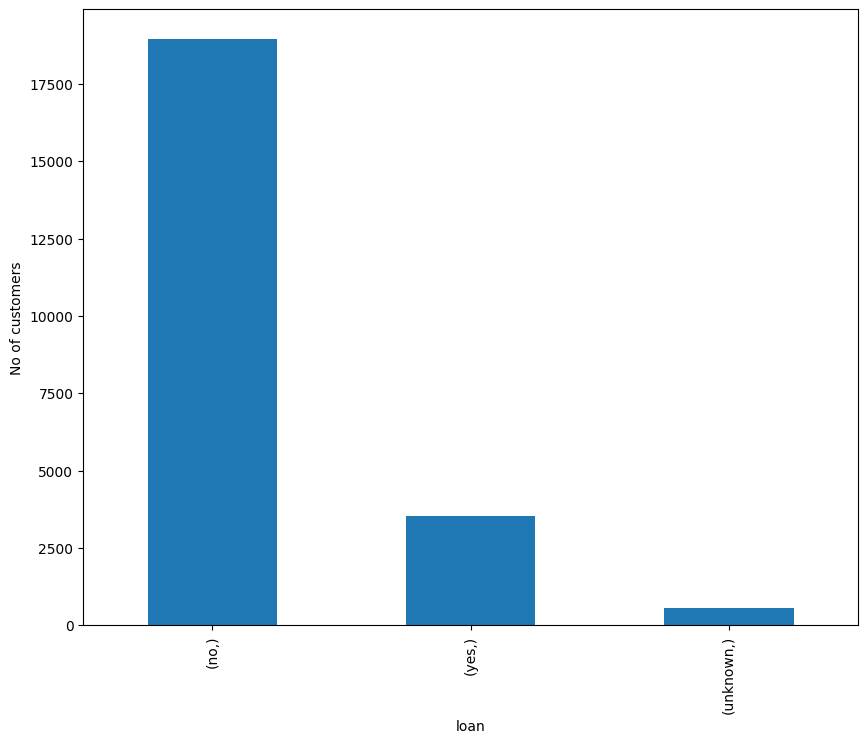

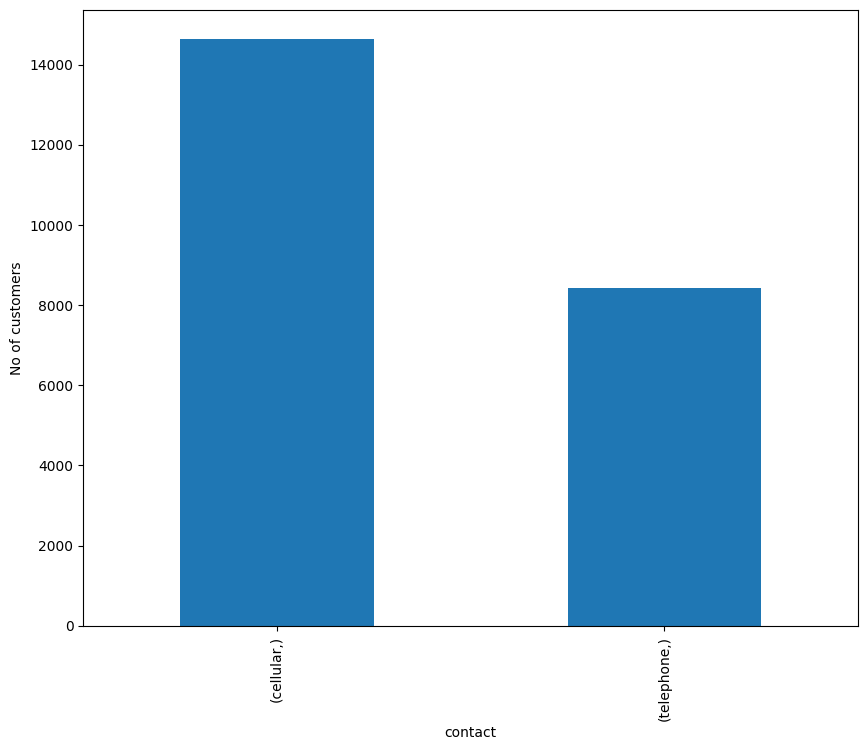

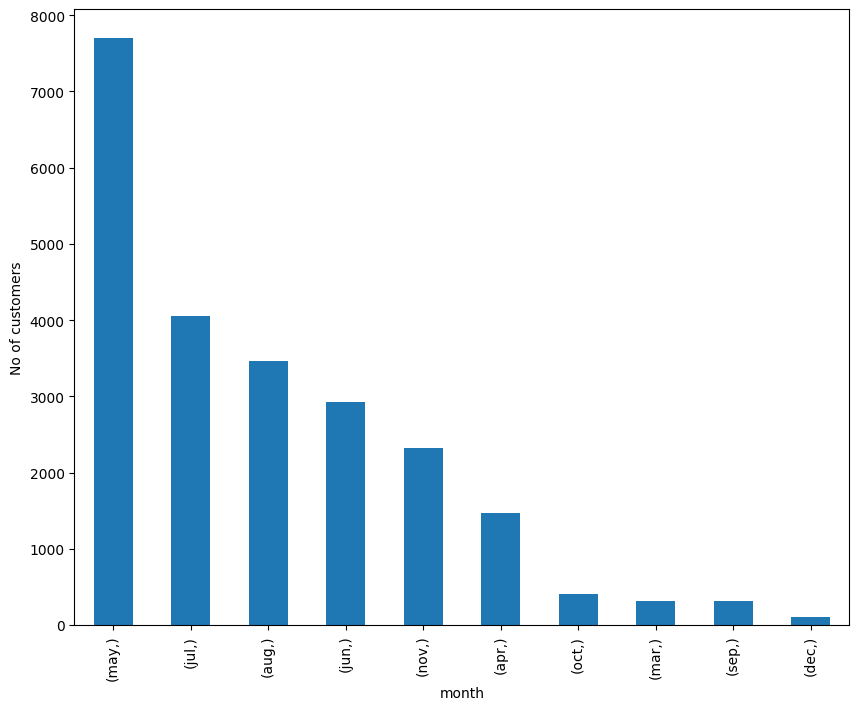

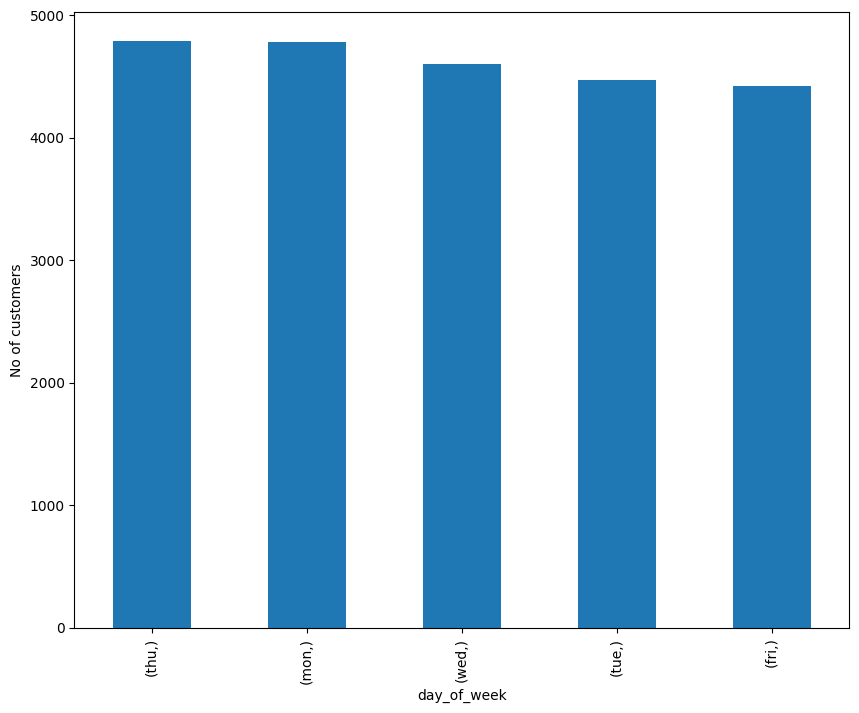

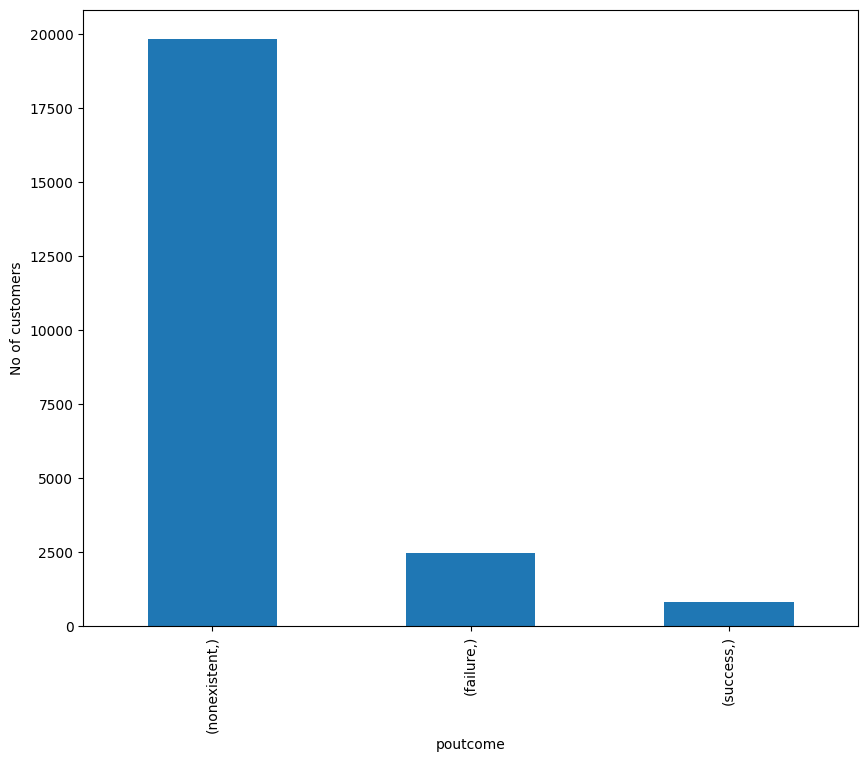

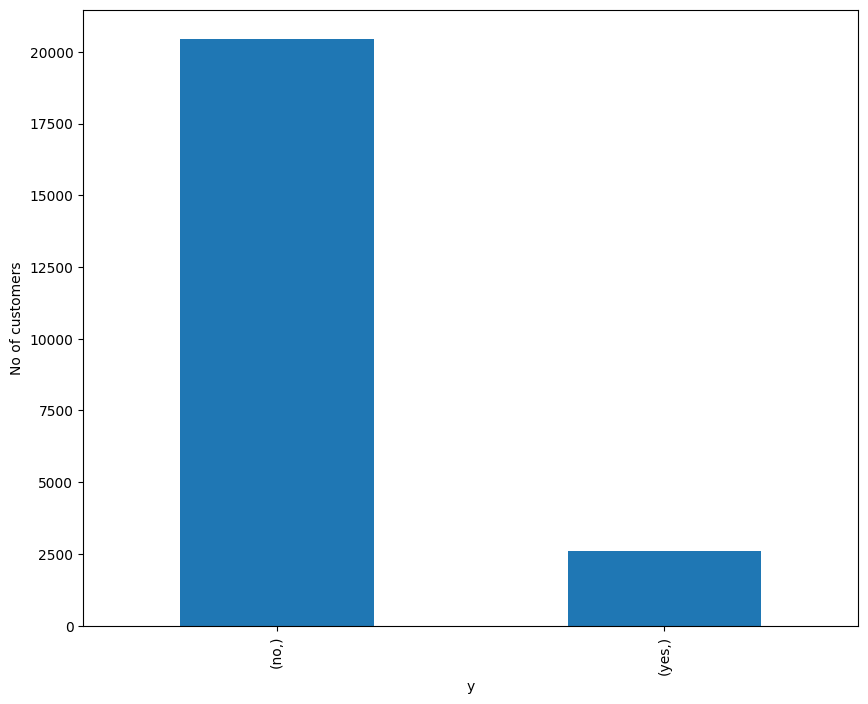

In [125]:
for col in data.select_dtypes(include=['object']).columns:
  data[[col]].value_counts().plot(kind='bar',figsize=(10,8))
  plt.xlabel(col)
  plt.ylabel("No of customers")
  plt.show()




<Axes: ylabel='None'>

0.5281161933665728

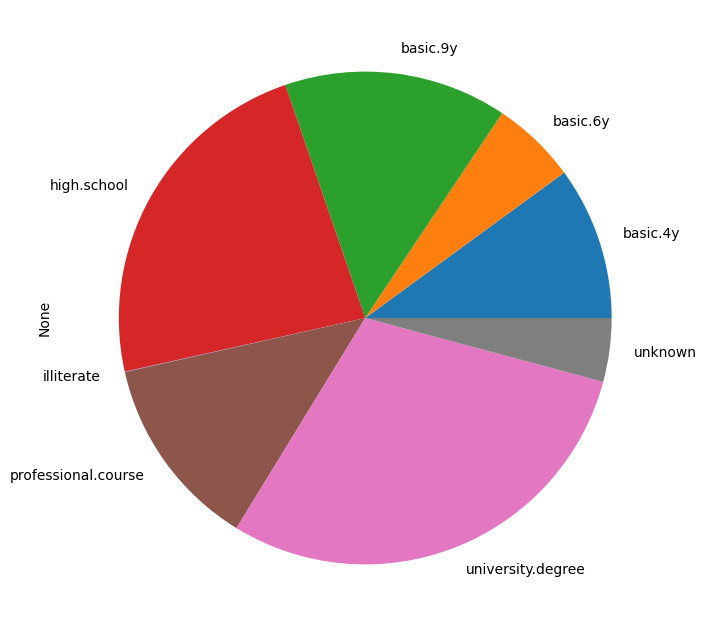

In [126]:
plot = data.groupby(['education']).size().plot.pie(figsize=(10,8))
edu_perc = (data.education.value_counts()['university.degree'] + data.education.value_counts()['high.school'] )/ data.shape[0] 
display(plot, edu_perc)



*   majority of customers are married
*   half of customers have obtained a high school diploma or university degree
*   a third of customers were last contacted in may 
*   majority of customers don't have a credit in default or a personal loan
*   ratio of having a house loan is almost 50:50



## Bivariate data visualization - categorical columns

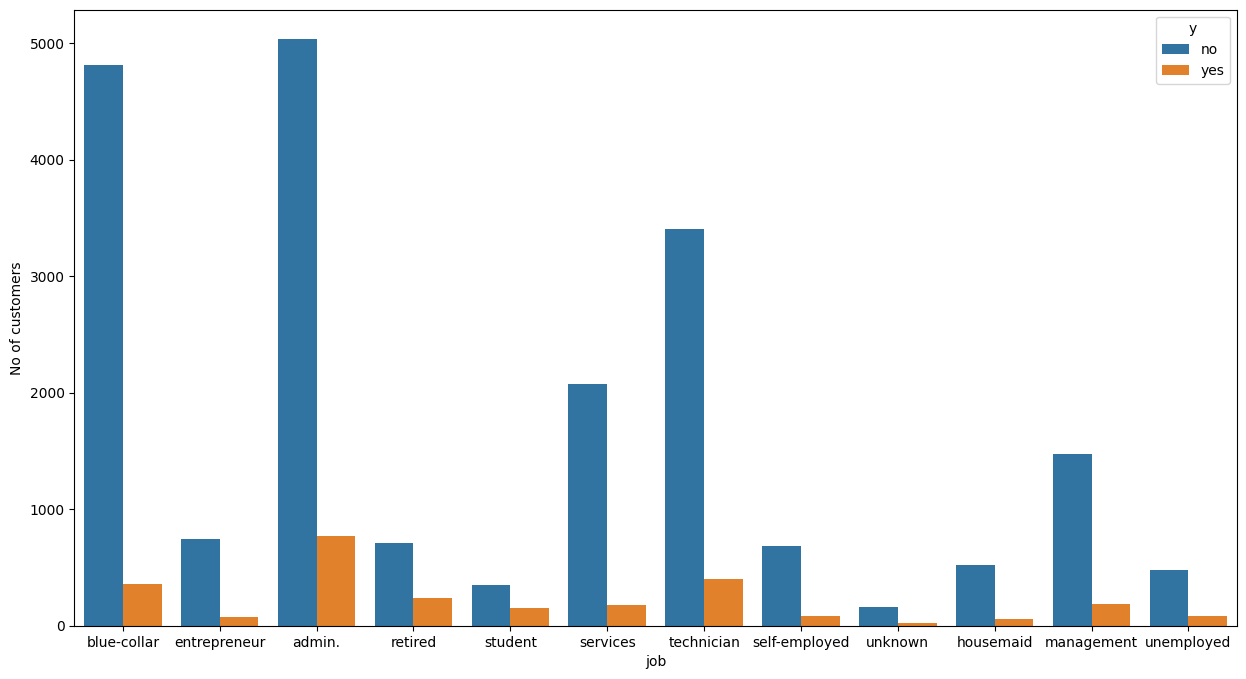

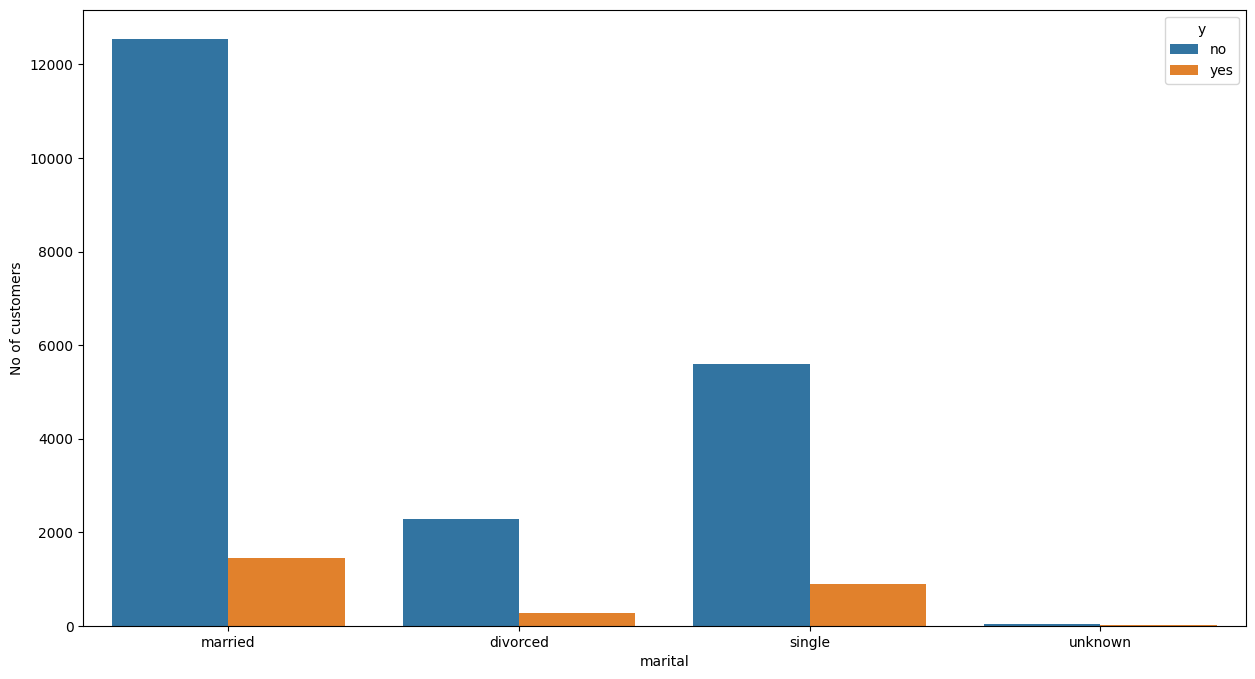

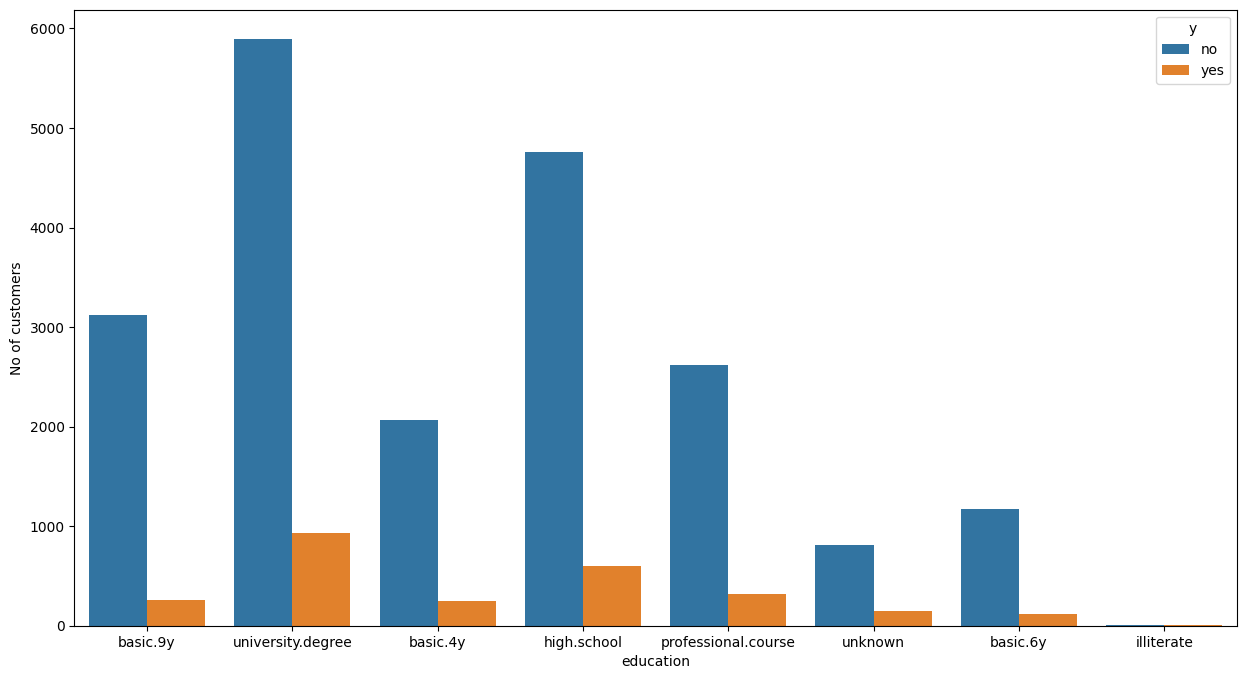

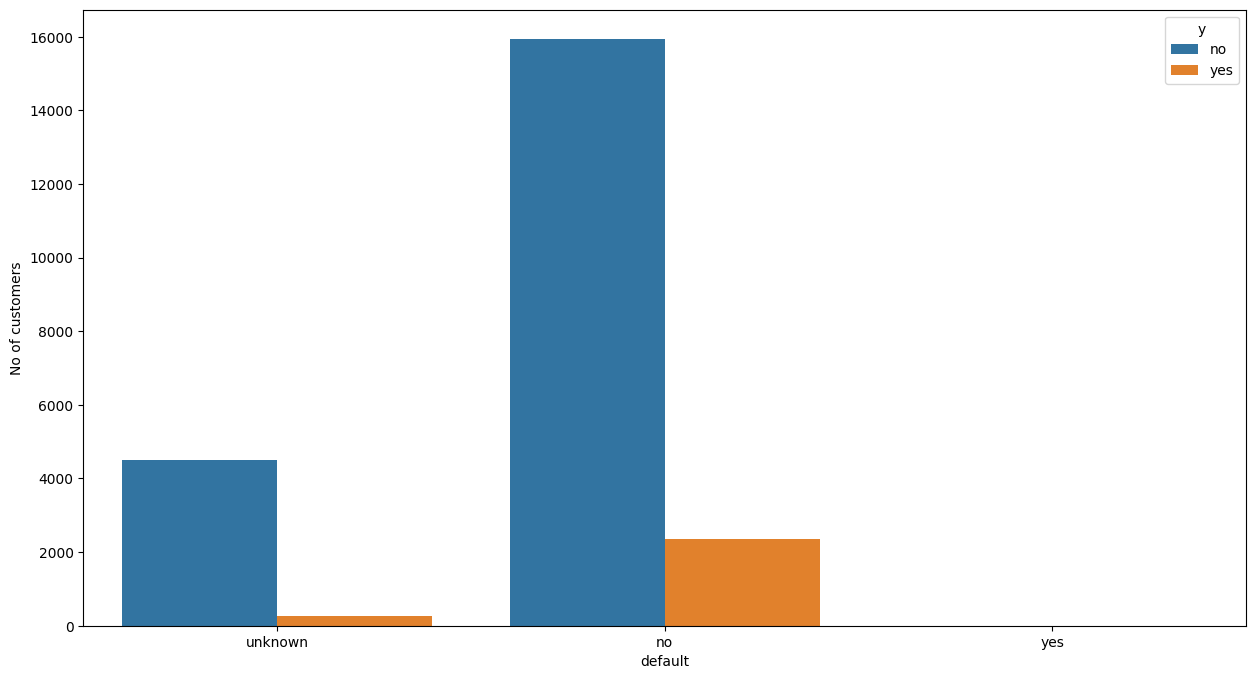

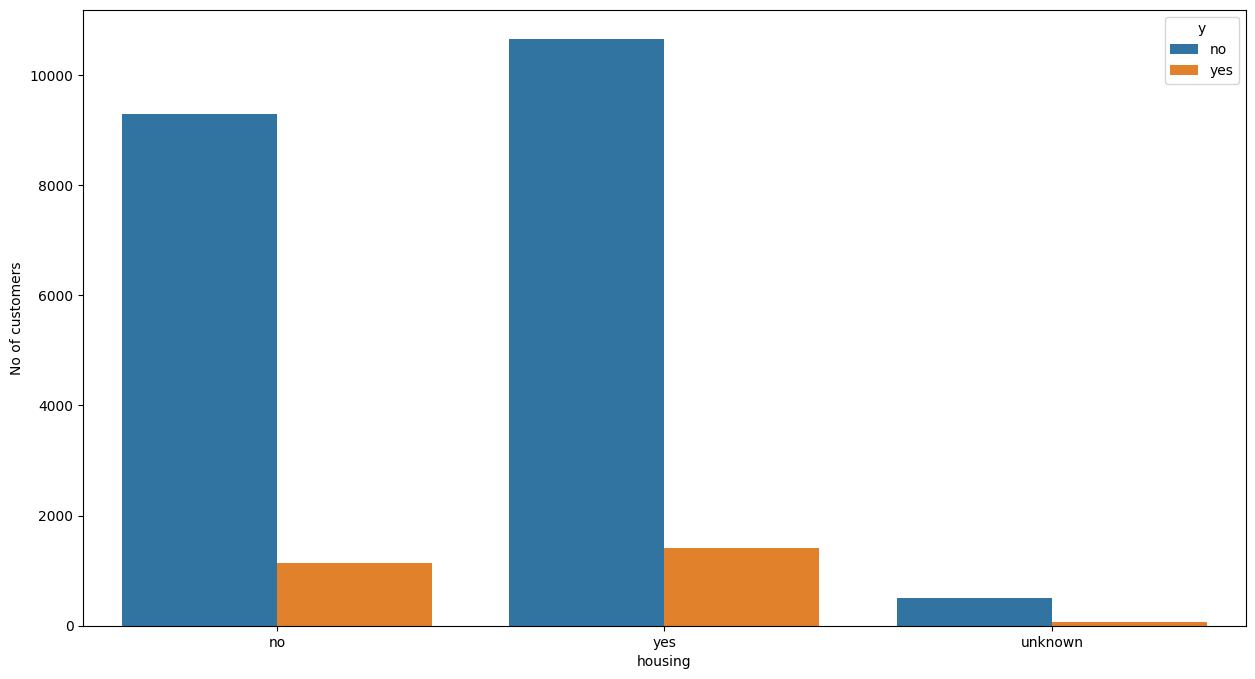

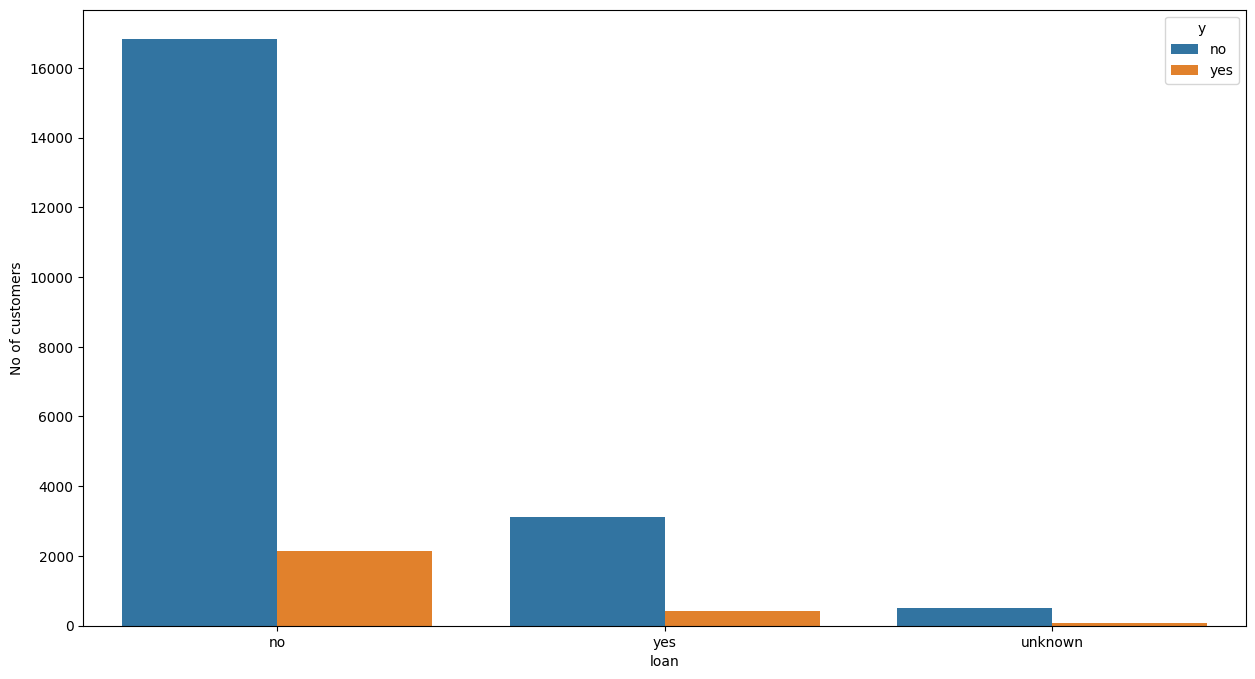

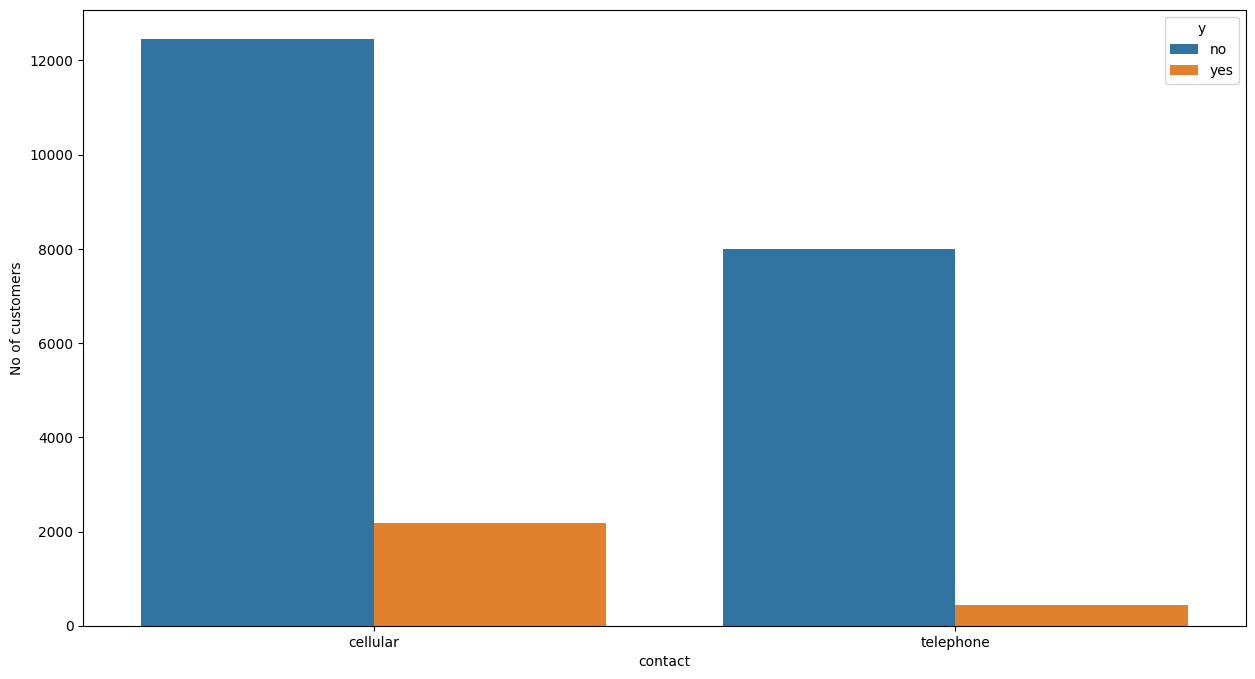

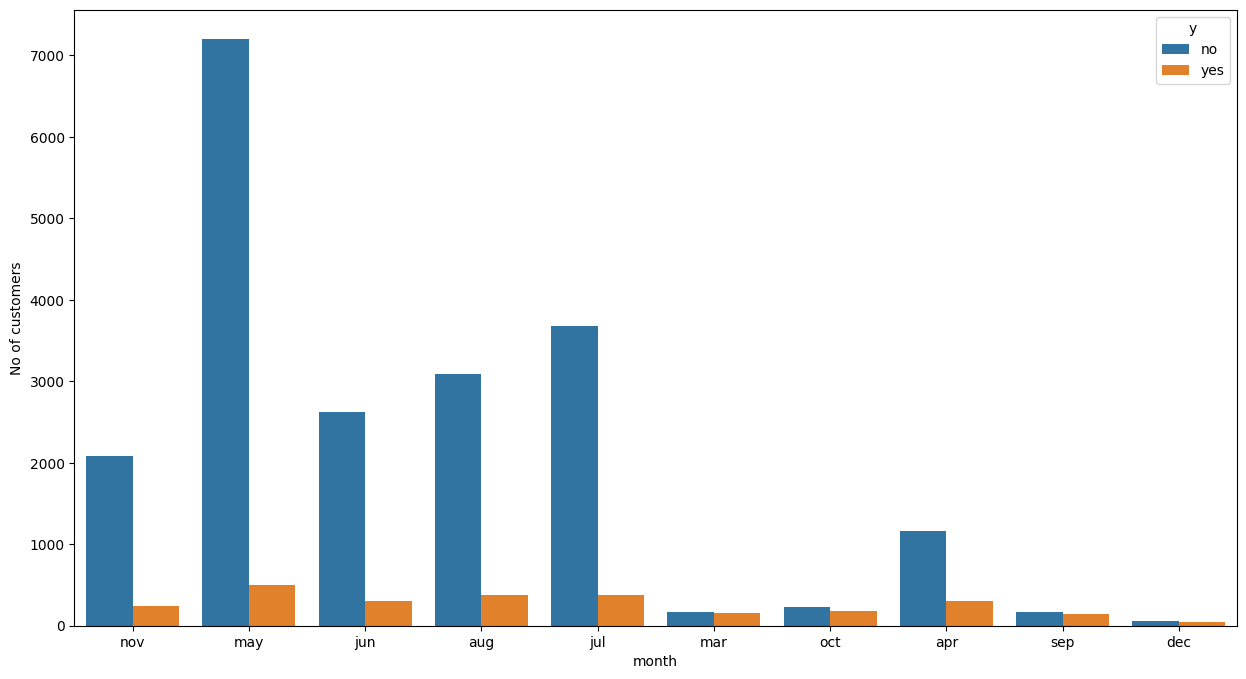

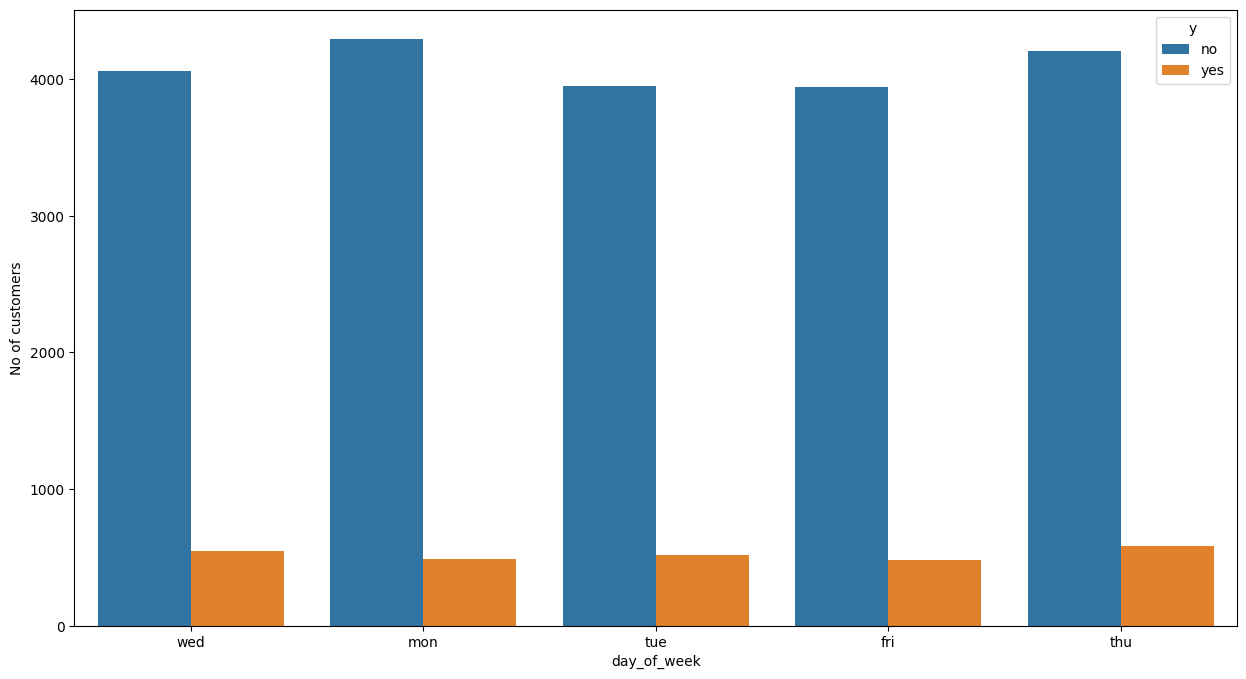

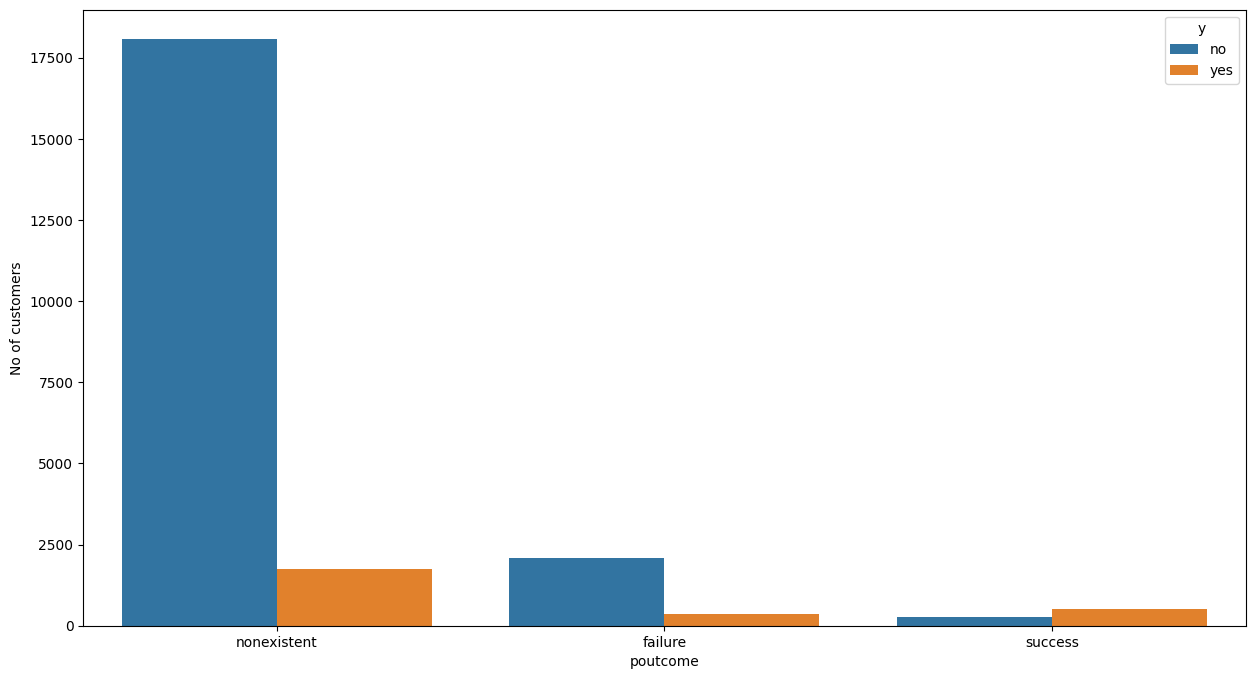

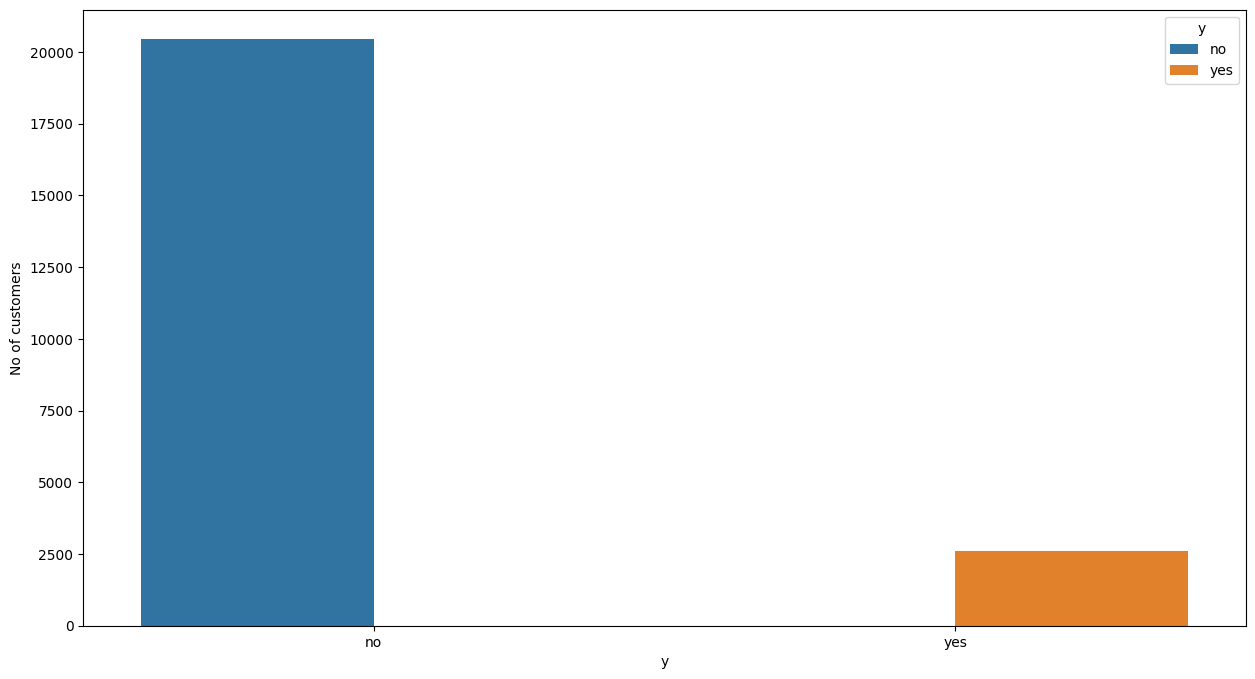

In [127]:
for col in data.select_dtypes(include=['object']).columns:
  #data[[col]].value_counts().plot(kind='bar',figsize=(10,8))
  plt.figure(figsize=(15,8))
  
  sns.countplot(x=data[col], hue=data["y"])
  plt.xlabel(col)
  plt.ylabel("No of customers")
  plt.show()


## Data visualization - numerical columns

<Axes: >

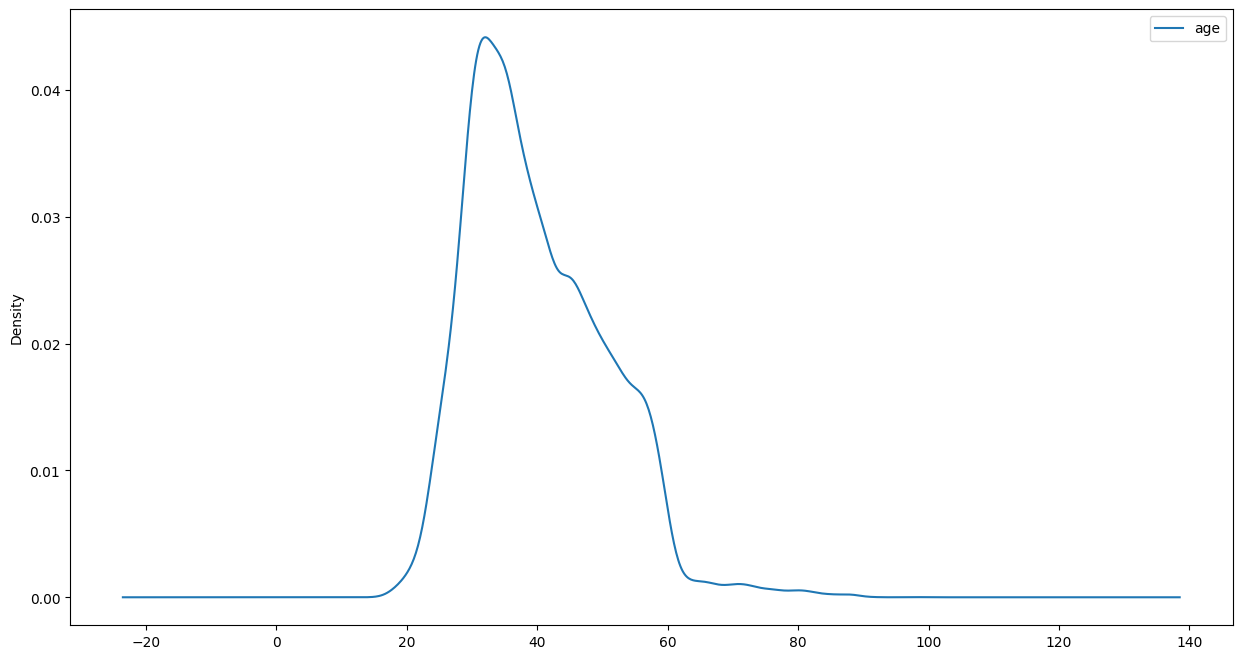

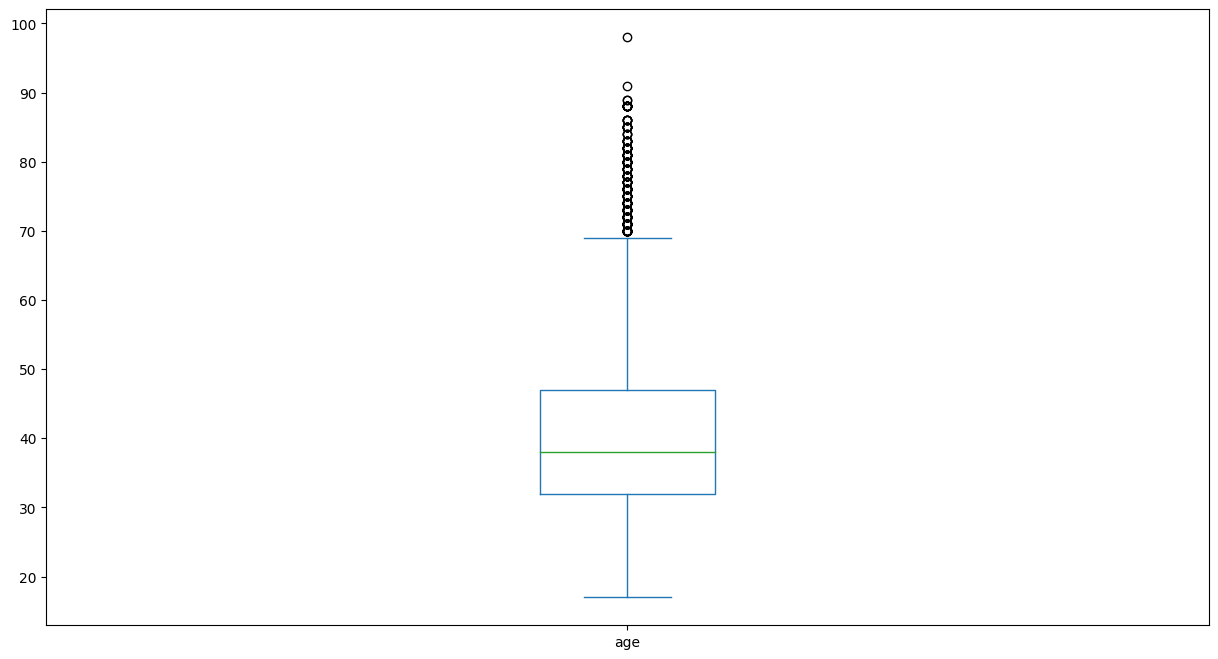

In [128]:
data[['age']].plot.kde(figsize=(15,8))
data[['age']].plot.box(figsize=(15,8))


<Axes: >

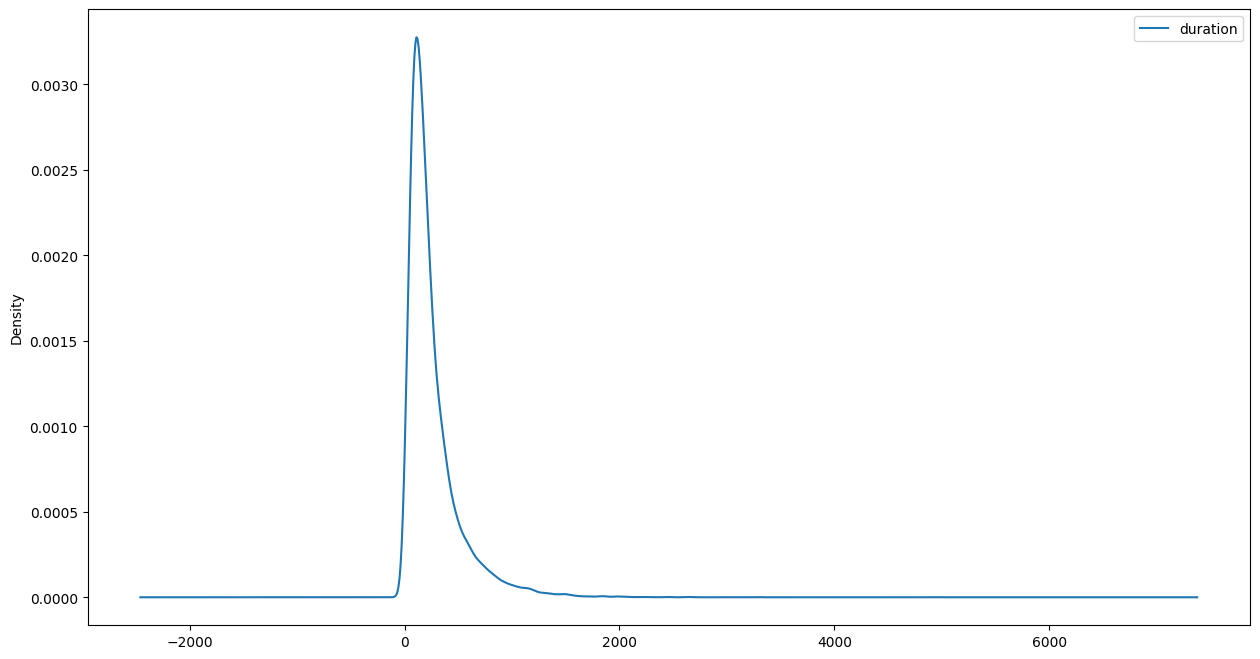

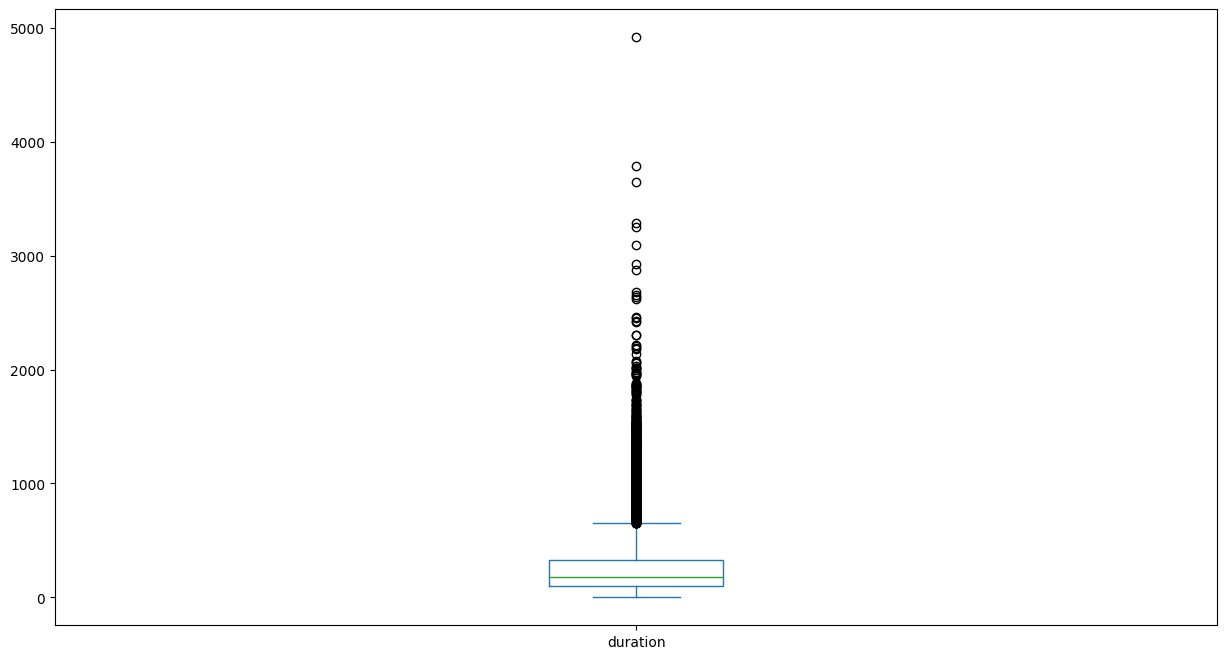

In [129]:
data[['duration']].plot.kde(figsize=(15,8))
data[['duration']].plot.box(figsize=(15,8))


<Axes: >

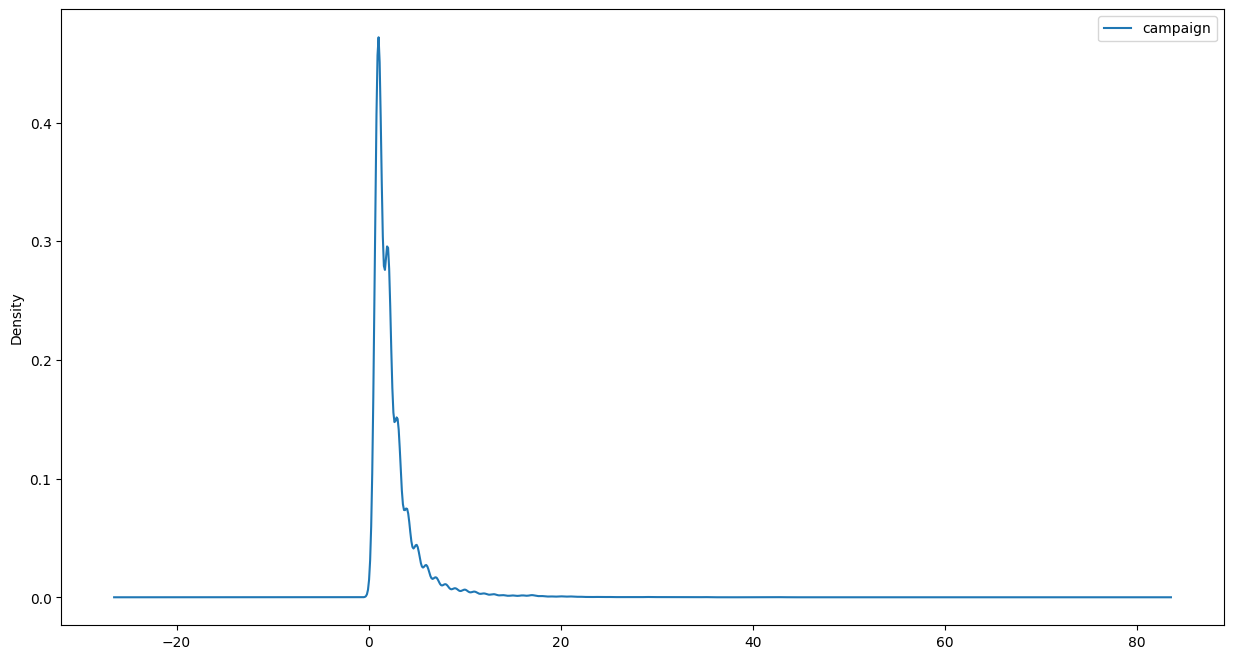

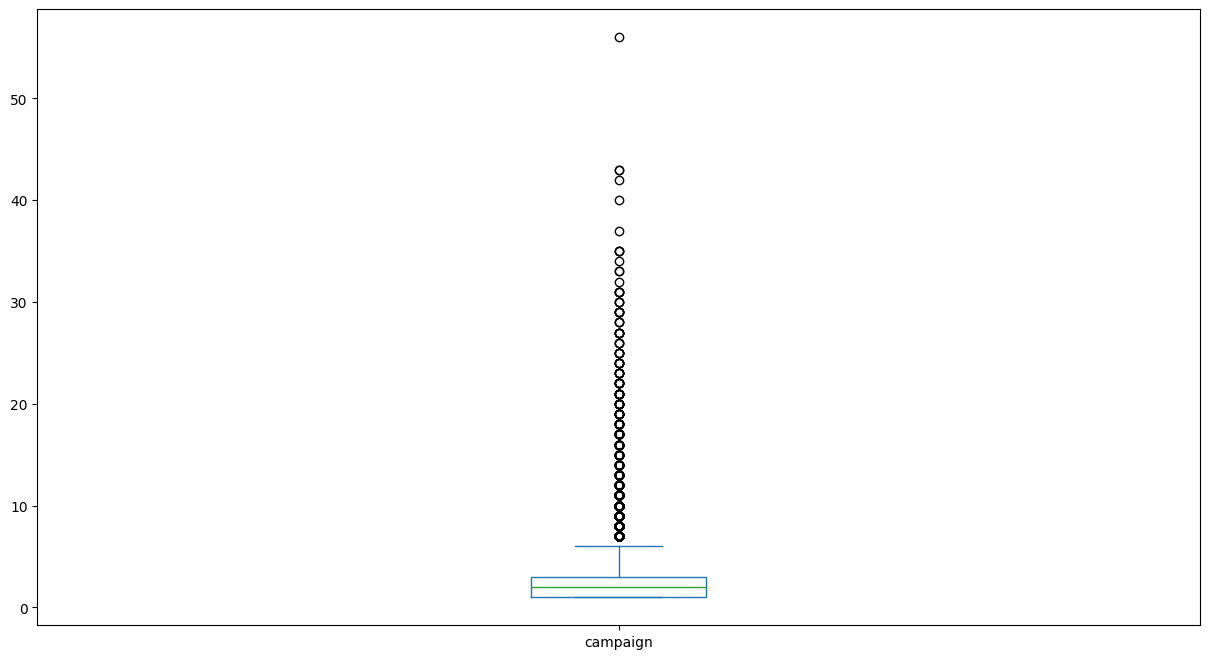

In [130]:
data[['campaign']].plot.kde(figsize=(15,8))
data[['campaign']].plot.box(figsize=(15,8))


<Axes: >

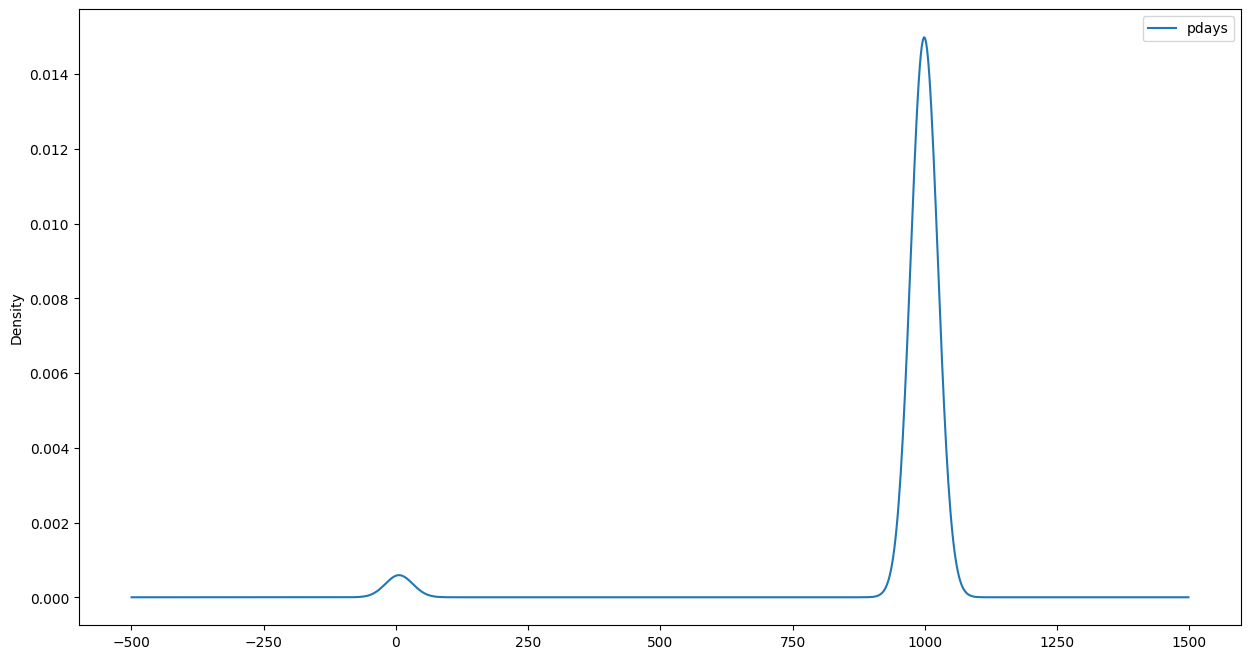

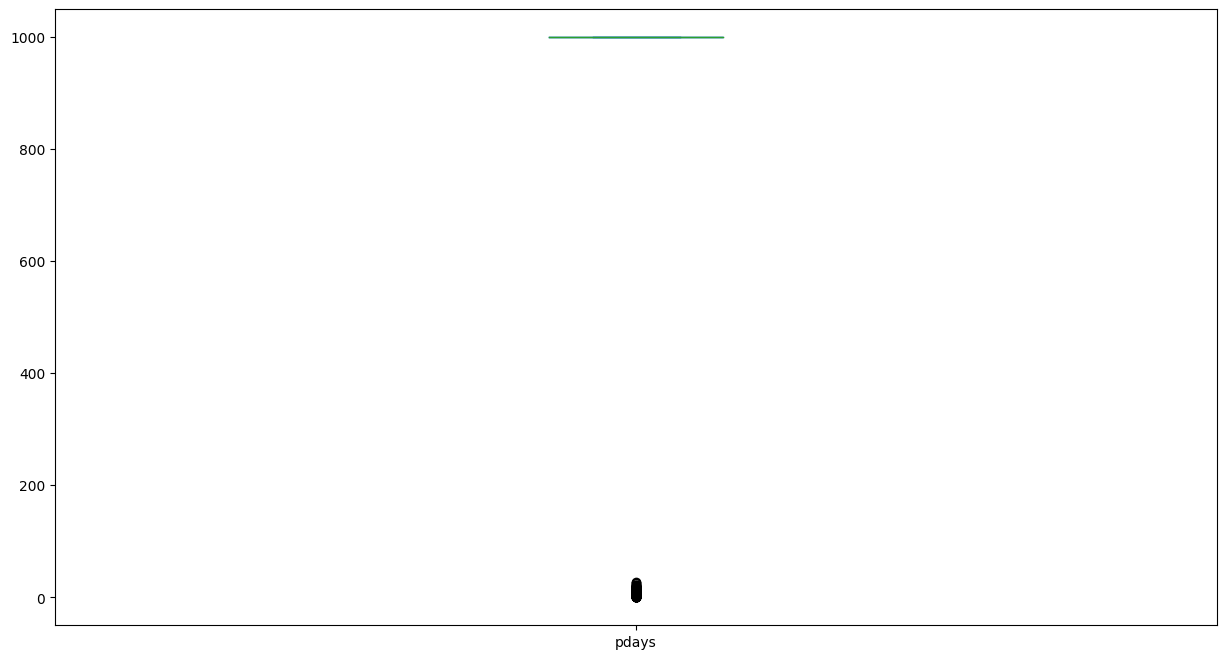

In [131]:
data[['pdays']].plot.kde(figsize=(15,8))
data[['pdays']].plot.box(figsize=(15,8))


<Axes: >

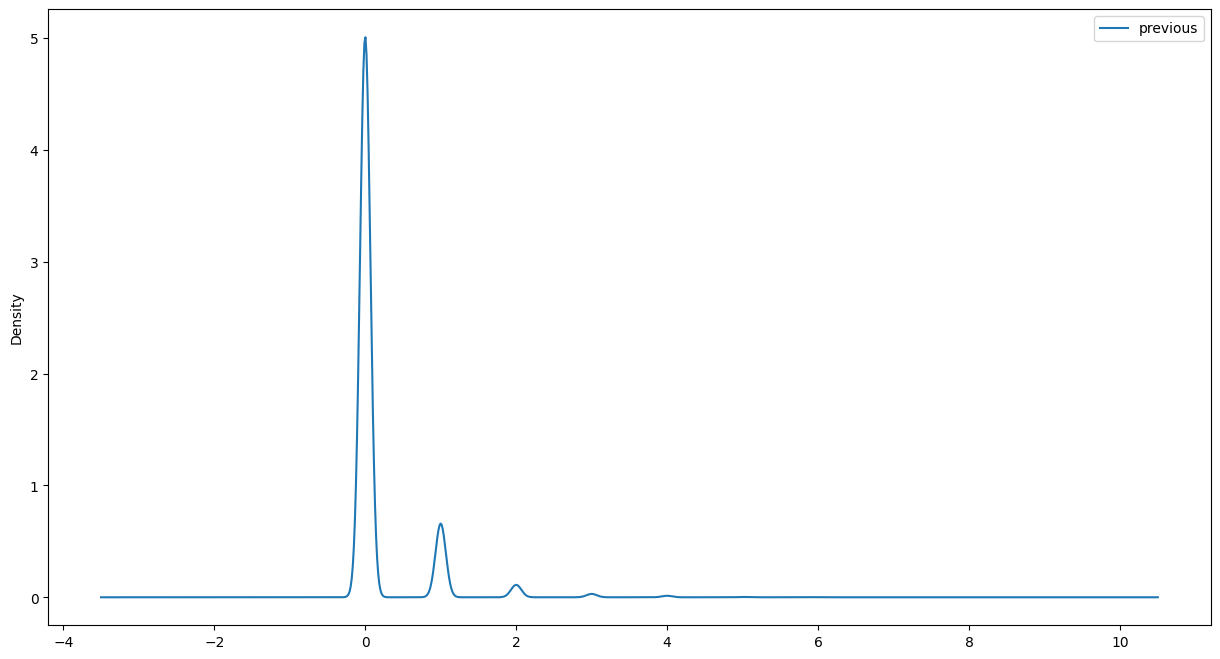

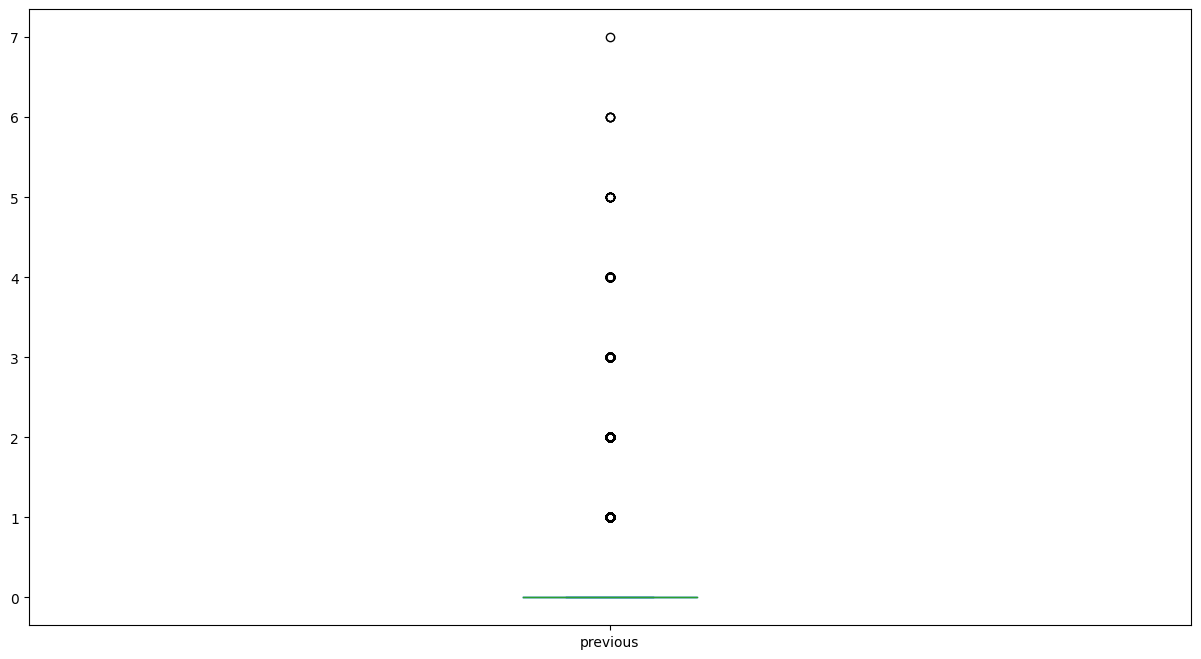

In [132]:
data[['previous']].plot.kde(figsize=(15,8))
data[['previous']].plot.box(figsize=(15,8))



*   Numerical columns contain outliers. Their distributions are skewed
*   **pdays** and **previous** concetrate mostly around one value, so it is most likely fine to leave them out



In [133]:
dropped_cols = data[['pdays','previous']]
data = data.drop(['pdays','previous'],axis=1)

In [134]:
data[['age','duration', 'campaign']].describe()

,age,duration,campaign
count,23065.000000,23065.000000,23065.000000
mean,39.995881,259.724821,2.556774
std,10.446050,257.357576,2.734493
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,181.000000,2.000000
75%,47.000000,323.000000,3.000000
max,98.000000,4918.000000,56.000000


## Handling outliers

Firstly let's double check the normality of numerical columns 

In [135]:
from scipy.stats import kstest
num_cols = ['age','duration', 'campaign']
df_data = zip(num_cols, [kstest(data[x], 'norm') for x in num_cols])
normality_df = pd.DataFrame(df_data).T
normality_df.rename(columns=normality_df.iloc[0], inplace = True)
normality_df.drop(normality_df.index[0], inplace = True)
normality_df

,age,duration,campaign
1,"(1.0, 0.0)","(0.9997081943553922, 0.0)","(0.8413447460685429, 0.0)"


p-values are less than 0.05, so the data cannot be assumed to be normal

I want to find out just how many outliers there are in each numerical column

In [136]:
data[num_cols].describe()

,age,duration,campaign
count,23065.000000,23065.000000,23065.000000
mean,39.995881,259.724821,2.556774
std,10.446050,257.357576,2.734493
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,181.000000,2.000000
75%,47.000000,323.000000,3.000000
max,98.000000,4918.000000,56.000000


In [137]:
outlier_df = pd.DataFrame(index = ['IQR', 'lower', 'upper', '%'])
outlier_df

""
IQR
lower
upper
%


In [138]:
for col in num_cols:
  IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
  lower_boundary = data[col].quantile(0.25) - 1.5 * IQR
  upper_boundary = data[col].quantile(0.75) + 1.5 * IQR
  perc = data[(data[col] > upper_boundary) | (data[col] < lower_boundary)][col].sum() / data.shape[0]
  ser = pd.Series([IQR, lower_boundary, upper_boundary, perc])
  ser.index = outlier_df.index
  outlier_df[col] = ser

In [139]:
outlier_df

,age,duration,campaign
IQR,15.000000,220.000000,2.000000
lower,9.500000,-227.000000,-2.000000
upper,69.500000,653.000000,6.000000
%,0.864383,68.847605,0.629482


In [140]:
data.y.value_counts()


no     20448
yes     2617
Name: y, dtype: int64

I will replace the outliers with the boundaries

In [141]:
data.loc[ data['age'] < outlier_df.iloc[1]['age'],'age' ] =  outlier_df.iloc[1]['age']
data.loc[ data['age'] > outlier_df.iloc[2]['age'],'age' ] =  outlier_df.iloc[2]['age']

data.loc[ data['duration'] > outlier_df.iloc[2]['duration'],  'duration'] =  outlier_df.iloc[2]['duration']

data.loc[ data['campaign'] > outlier_df.iloc[2]['campaign'],'campaign'  ] =  outlier_df.iloc[2]['campaign']


In [142]:
data.y.value_counts()


no     20448
yes     2617
Name: y, dtype: int64

In [143]:
data[num_cols].describe()

,age,duration,campaign
count,23065.000000,23065.000000,23065.000000
mean,39.914936,237.364362,2.271450
std,10.169126,179.455986,1.544005
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,181.000000,2.000000
75%,47.000000,323.000000,3.000000
max,69.500000,653.000000,6.000000


## Encoding

In [144]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
label = LabelEncoder()
onehot = OneHotEncoder()
ordinal = OrdinalEncoder()

In [145]:
cat_cols = list(data.select_dtypes(include=['object']).columns)
cat_cols.remove('y')


In [146]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

Encoding the target value to be either 0 or a 1 

In [147]:
data.y = label.fit_transform(data.y)
data.y.value_counts()

0    20448
1     2617
Name: y, dtype: int64

<Figure size 2500x1500 with 0 Axes>

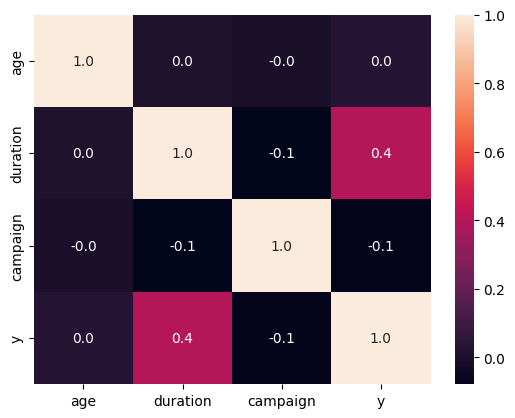

<Figure size 2500x1500 with 0 Axes>

In [148]:
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.figure(figsize=(25,15))

In [149]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:

from sklearn.model_selection import train_test_split
from category_encoders.leave_one_out import LeaveOneOutEncoder
from imblearn.combine import SMOTETomek

loo = LeaveOneOutEncoder(return_df=True,random_state=1)
y = data.y
X = data.drop('y',axis=1)
X = loo.fit_transform(X, y)


<Figure size 2500x1500 with 0 Axes>

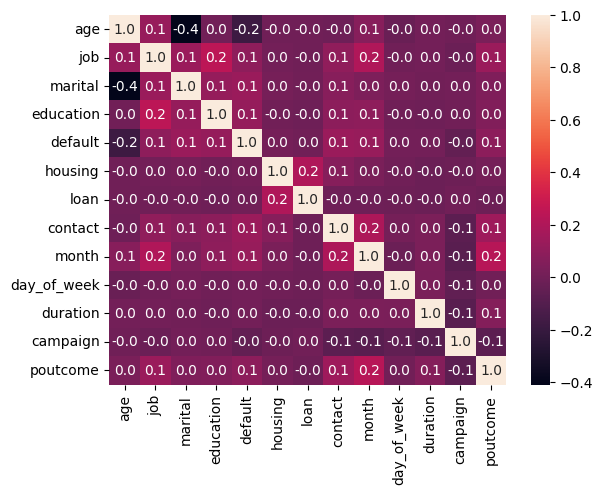

<Figure size 2500x1500 with 0 Axes>

In [151]:
sns.heatmap(X.corr(), annot=True, fmt='.1f')
plt.figure(figsize=(25,15))

In [152]:
smote = SMOTETomek(random_state=1)
X_sm, y_sm = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, random_state=1)

# Modeling

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc

In [154]:
lr = LogisticRegression(random_state=1, max_iter = 1000)
svc = SVC(random_state=1)
rfc = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
models = [lr,svc,rfc,xgb]

In [155]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
15379,38.0,0.132541,0.137942,0.136070,0.128928,0.116466,0.112805,0.149105,0.107843,0.108646,116,1,0.088557
28970,52.0,0.249737,0.102990,0.107127,0.128874,0.109600,0.112752,0.051489,0.104850,0.118618,633,1,0.088507
16151,35.0,0.105623,0.103061,0.109103,0.128928,0.116466,0.112805,0.149105,0.107843,0.102092,132,4,0.088557
25401,49.0,0.138122,0.103061,0.089494,0.128928,0.109695,0.112805,0.051608,0.105191,0.118836,152,6,0.088557
15443,43.0,0.110843,0.103061,0.136070,0.128928,0.109695,0.112805,0.149105,0.101856,0.116331,188,1,0.088557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15617,34.0,0.153710,0.103061,0.111401,0.128928,0.119508,0.119508,0.149105,0.101856,0.121529,72,2,0.145135
24699,38.0,0.132541,0.103061,0.136070,0.128928,0.109695,0.112805,0.149105,0.107843,0.121529,25,6,0.088557
7393,29.0,0.132541,0.103061,0.111401,0.128928,0.116466,0.112805,0.051608,0.064344,0.116331,29,3,0.088557
17347,32.0,0.069592,0.102990,0.088716,0.053958,0.116383,0.112752,0.149036,0.064214,0.118618,459,1,0.088507


In [156]:
metrics_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
for model in models:
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  col = pd.Series(data=[accuracy_score(pred, y_test), precision_score(pred, y_test), recall_score(pred, y_test),f1_score(pred, y_test)],
                  index= ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                  name=type(model).__name__)
  metrics_df[type(model).__name__] = col

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
y_train.value_counts()

0    15306
1     1992
Name: y, dtype: int64

In [158]:
metrics_df

,LogisticRegression,SVC,RandomForestClassifier,XGBClassifier
Accuracy,0.899775,0.891625,1.0,1.0
Precision,0.268800,0.000000,1.0,1.0
Recall,0.581315,0.000000,1.0,1.0
F1-Score,0.367615,0.000000,1.0,1.0


# Metrics

Text(33.22222222222222, 0.5, 'Predicted Values')

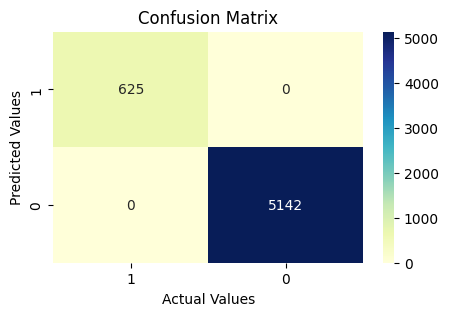

In [159]:
tn, fp , fn, tp = confusion_matrix(y_test,rfc.predict(X_test)).ravel()

plt.figure(figsize = (5,3)) 

sns.heatmap(np.array([tp, fp , fn, tn]).reshape(2,2),xticklabels = [1,0],
            yticklabels = [1,0],fmt='d', annot = True,cmap="YlGnBu")

plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


# Modeling and metrics for the resampled sets

In [160]:
lr_sm = LogisticRegression(random_state=1, max_iter = 1000)
svc_sm = SVC(random_state=1)
rfc_sm = RandomForestClassifier(random_state=1)
xgb_sm = XGBClassifier(random_state=1)
models_sm = [lr_sm,svc_sm,rfc_sm,xgb_sm]

In [161]:
X_sm_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
14737,37.0,0.105623,0.103061,0.109103,0.128928,0.116466,0.116114,0.149105,0.064344,0.108646,132,1,0.088557
1854,29.0,0.153710,0.137942,0.111401,0.128928,0.109695,0.112805,0.149105,0.105191,0.116331,189,1,0.088557
2136,30.0,0.132541,0.137942,0.136070,0.128928,0.109695,0.112805,0.149105,0.101856,0.121529,319,5,0.088557
21941,43.0,0.105623,0.107939,0.109103,0.128928,0.116466,0.112805,0.149105,0.064344,0.102092,143,1,0.088557
14680,45.0,0.132541,0.103061,0.089494,0.128928,0.116466,0.112805,0.051608,0.064344,0.116331,114,1,0.088557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23741,50.0,0.069592,0.102990,0.093656,0.128874,0.112439,0.112752,0.108208,0.081132,0.110018,653,3,0.088507
1296,30.0,0.079414,0.103061,0.111401,0.128928,0.109695,0.112805,0.149105,0.064344,0.102092,286,3,0.088557
1432,36.0,0.132541,0.103061,0.075237,0.128928,0.116466,0.112805,0.051608,0.105191,0.121529,622,4,0.088557
11645,30.0,0.069785,0.107939,0.075237,0.128928,0.116466,0.112805,0.051608,0.064344,0.118836,211,1,0.088557


In [162]:
metrics_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
for model in models_sm:
  model.fit(X_sm_train, y_sm_train)
  pred = model.predict(X_sm_test)
  col = pd.Series(data=[accuracy_score(pred, y_sm_test), precision_score(pred, y_sm_test), recall_score(pred, y_sm_test),f1_score(pred, y_sm_test)],
                  index= ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                  name=type(model).__name__)
  metrics_df[type(model).__name__ + '_sm'] = col

In [163]:
metrics_df

,LogisticRegression_sm,SVC_sm,RandomForestClassifier_sm,XGBClassifier_sm
Accuracy,0.854118,0.735010,1.0,1.0
Precision,0.865669,0.724979,1.0,1.0
Recall,0.844369,0.736919,1.0,1.0
F1-Score,0.854886,0.730900,1.0,1.0


Text(33.22222222222222, 0.5, 'Predicted Values')

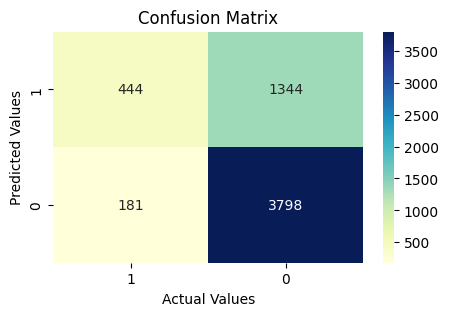

In [164]:
tn, fp , fn, tp = confusion_matrix(y_test,svc_sm.predict(X_test)).ravel()

plt.figure(figsize = (5,3)) 

sns.heatmap(np.array([tp, fp , fn, tn]).reshape(2,2),xticklabels = [1,0],
            yticklabels = [1,0],fmt='d', annot = True,cmap="YlGnBu")

plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

We can see that SMOTe improved our scores

In [165]:
X_sm_train.shape

(29467, 13)

Preprocessing steps taken to achieve these scores



*   Dropped **pdays** and **previous**
*   Replaced outliers with boundary values in  **age**, **duration**, **campaign**
*   Encoded no -> 0; yes -> 1 in **y** column
*   Encoded the rest of categorical columns with LeaveOneOut
*   Performed oversampling using SMOTETomek 
*   Modeling


In [166]:
data_test.drop(['pdays','previous'],axis=1,inplace=True)

In [167]:
data_test.loc[ data_test['age'] < outlier_df.iloc[1]['age'],'age' ] =  outlier_df.iloc[1]['age']
data_test.loc[ data_test['age'] > outlier_df.iloc[2]['age'],'age' ] =  outlier_df.iloc[2]['age']

data_test.loc[ data_test['duration'] > outlier_df.iloc[2]['duration'],  'duration'] =  outlier_df.iloc[2]['duration']

data_test.loc[ data_test['campaign'] > outlier_df.iloc[2]['campaign'],'campaign'  ] =  outlier_df.iloc[2]['campaign']

In [168]:
data_test.y = label.transform(data_test.y)

In [169]:
data_test_y = data_test.y
data_test_X = data_test.drop('y',axis=1)
data_test_X = loo.transform(data_test_X, data_test_y)


In [170]:
data_test_X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
2818,43.0,0.079414,0.103061,0.075237,0.054168,0.109695,0.112805,0.051608,0.064344,0.116331,102,1,0.088557
4341,36.0,0.069785,0.137942,0.107559,0.128928,0.116466,0.112805,0.051608,0.105191,0.121529,182,2,0.088557
15723,33.0,0.132541,0.103061,0.136070,0.054168,0.116466,0.112805,0.149105,0.107843,0.108646,156,1,0.088557
15466,32.0,0.069592,0.102990,0.074941,0.128874,0.116383,0.115831,0.149036,0.207509,0.108420,482,2,0.088507
23752,34.0,0.069785,0.103061,0.075237,0.054168,0.116466,0.112805,0.051608,0.064344,0.108646,653,2,0.088557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,39.0,0.105623,0.137942,0.109103,0.128928,0.116466,0.112805,0.051608,0.064344,0.116331,25,1,0.088557
4620,34.0,0.069785,0.103061,0.075237,0.128928,0.109695,0.112805,0.051608,0.105191,0.116331,7,1,0.088557
27347,31.0,0.132541,0.103061,0.111401,0.128928,0.116466,0.112805,0.149105,0.093557,0.121529,197,1,0.088557
6009,56.0,0.079414,0.107939,0.111401,0.054168,0.116466,0.112805,0.149105,0.208191,0.121529,144,2,0.088557


In [171]:
test_metrics_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
for model in models_sm:
  pred = model.predict(data_test_X)
  col = pd.Series(data=[accuracy_score(pred, data_test_y), precision_score(pred, data_test_y), recall_score(pred, data_test_y),f1_score(pred, data_test_y)],
                  index= ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                  name=type(model).__name__)
  test_metrics_df[type(model).__name__ + '_sm'] = col
test_metrics_df

,LogisticRegression_sm,SVC_sm,RandomForestClassifier_sm,XGBClassifier_sm
Accuracy,0.847951,0.742539,1.0,1.0
Precision,0.809132,0.717808,1.0,1.0
Recall,0.406422,0.260093,1.0,1.0
F1-Score,0.541069,0.381831,1.0,1.0
